In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



**age**: the age of the patient in years.

**sex**: the sex of the patient (1 = male, 0 = female).

**cp**: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

**trestbps**: the resting blood pressure of the patient in mm Hg.

**chol**: the serum cholesterol level of the patient in mg/dl.

**fbs**: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

**restecg**: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

**thalach**: the maximum heart rate achieved by the patient during exercise.
exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

**oldpeak**: the ST depression induced by exercise relative to rest.
slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest
Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

**ca**: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

**thal**: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

target: the presence of heart disease in the patient (0 = no disease, 1 = disease present).





In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Null values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# duplicates

df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

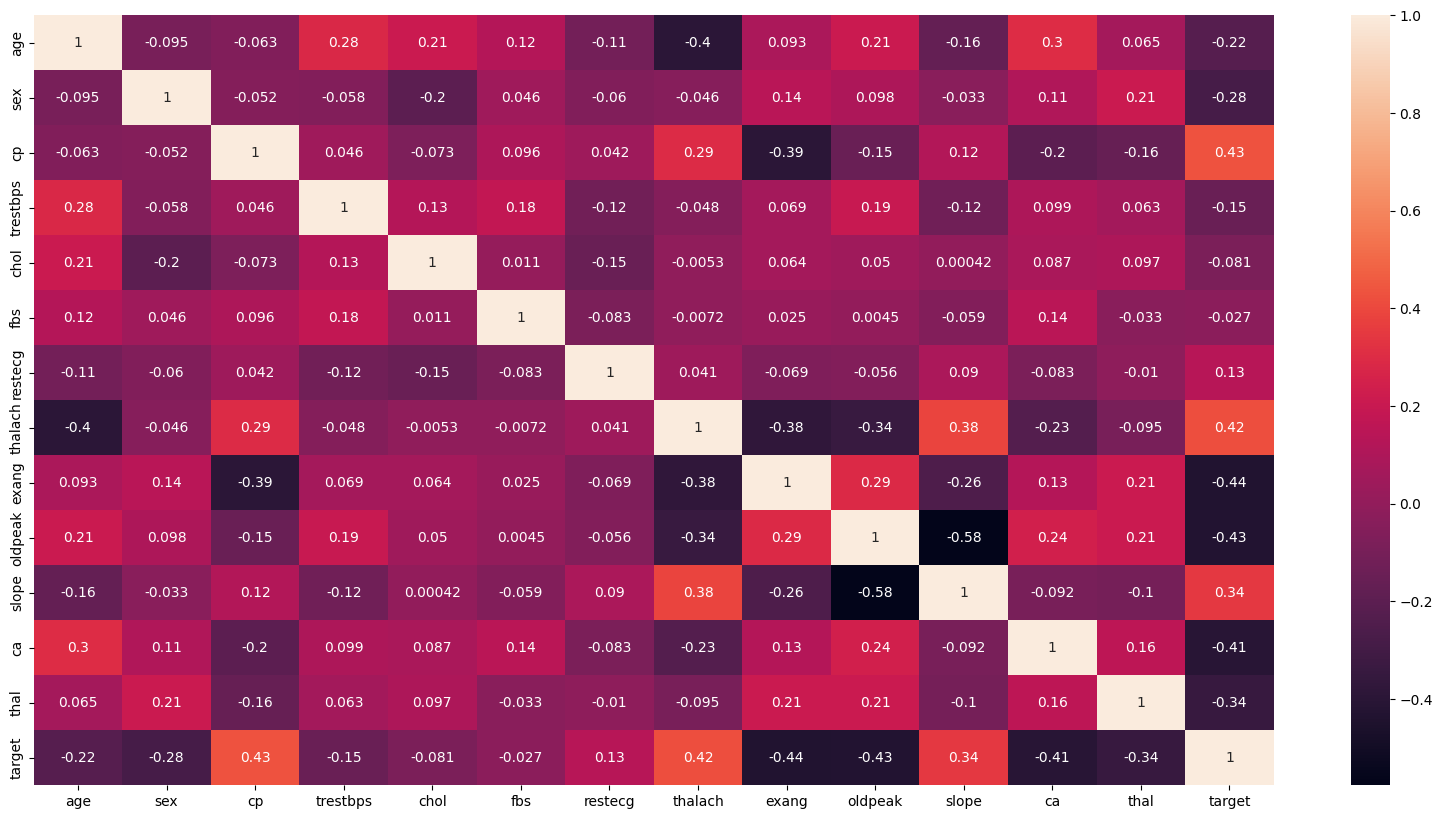

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

In [ ]:
# Statistical summary

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# check for majority of males or females recorded
df["sex"].value_counts()  #0 female, 1 male

1    206
0     96
Name: sex, dtype: int64

In [ ]:
# majority of heart patients or no heart patients

df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

In [ ]:
# Analysis :  above age 30 there is more chances of getting a heart disease

In [ ]:
# Chol

df[df["chol"] > 200].shape

(252, 14)

In [ ]:
# 252 persons are at higher of getting heart disease based on higher chol level

In [ ]:
df["chol"] > 200

0       True
1       True
2       True
3       True
4       True
       ...  
298     True
299     True
300    False
301    False
302     True
Name: chol, Length: 302, dtype: bool

In [ ]:
# to find how many people can recover, having reversible thallium
df[df["thal"] == 2].shape

(165, 14)

In [ ]:
# Analysis :  165 persons can be cured for thallium condition

<Axes: xlabel='chol'>

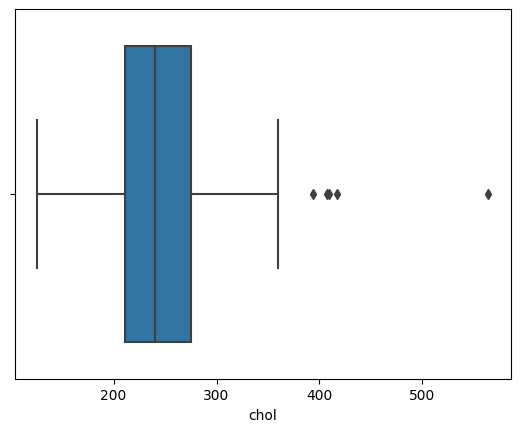

In [ ]:
sns.boxplot( x = "chol", data = df)

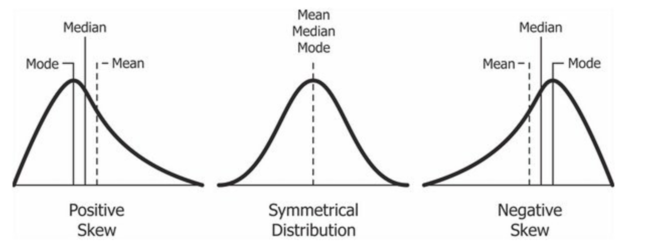

In [ ]:
# Visualization

# How we find distributions of data
# plots -- matplotlib - histogram
# plots -- seaborn --- distplot, kdeplot
# stat test --- shapiro wilk test



Text(0.5, 1.0, 'Age distribution')

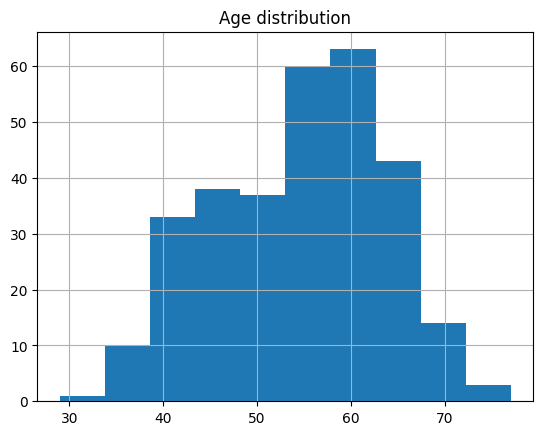

In [ ]:
# Age column

df["age"].hist(bins = 10)
plt.title("Age distribution")

In [ ]:
# Age column is nefatively skewed

<ipython-input-36-eef84e7ff8f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

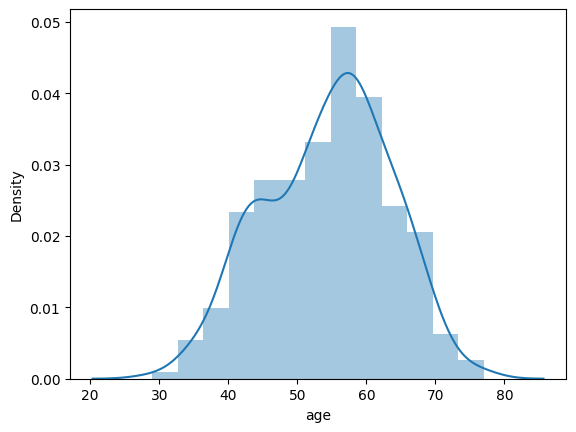

In [ ]:
sns.distplot(df["age"])

<Axes: xlabel='age', ylabel='Density'>

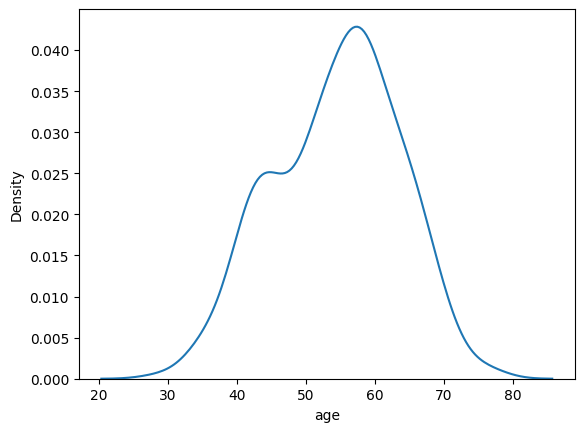

In [ ]:
sns.kdeplot(df["age"])  #kernel density estimation

<ipython-input-40-f78438973eb0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["sex"] == 1]["age"], label = "Male")
<ipython-input-40-f78438973eb0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["sex"] == 0]["age"], label = "FeMale")


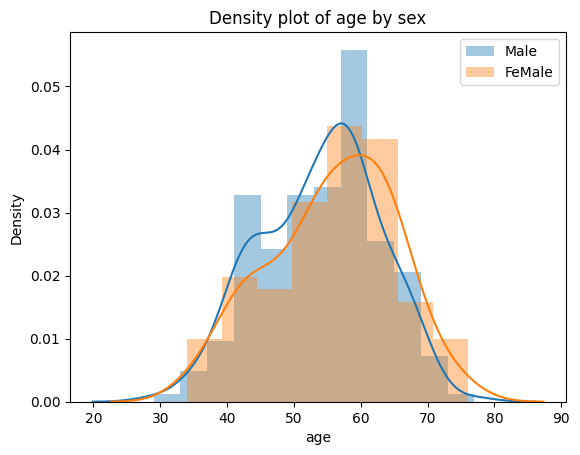

In [ ]:

sns.distplot(df[df["sex"] == 1]["age"], label = "Male")
sns.distplot(df[df["sex"] == 0]["age"], label = "FeMale")
plt.title("Density plot of age by sex")
plt.legend()

<Axes: >

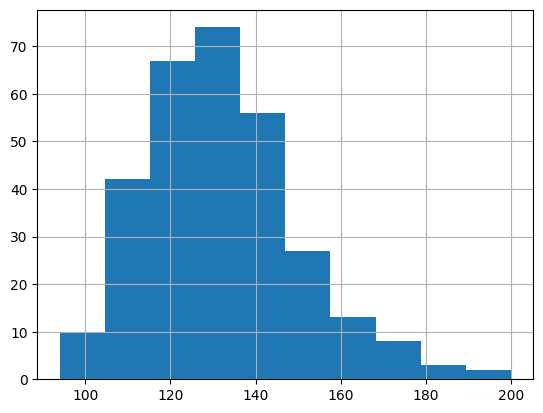

In [ ]:
# Trestbp
df["trestbps"].hist()

<ipython-input-42-6d45a6edfadc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["trestbps"])


<Axes: xlabel='trestbps', ylabel='Density'>

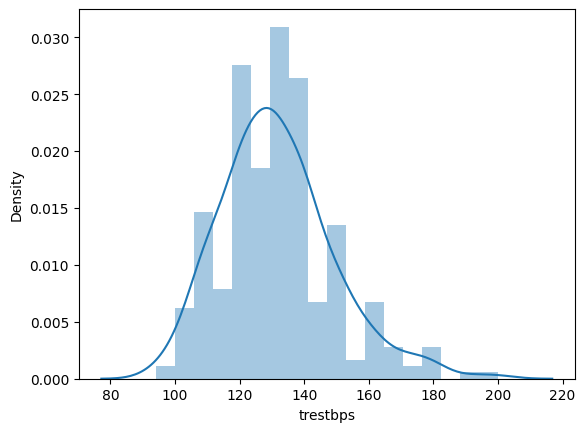

In [ ]:
sns.distplot(df["trestbps"])

<Axes: xlabel='sex', ylabel='count'>

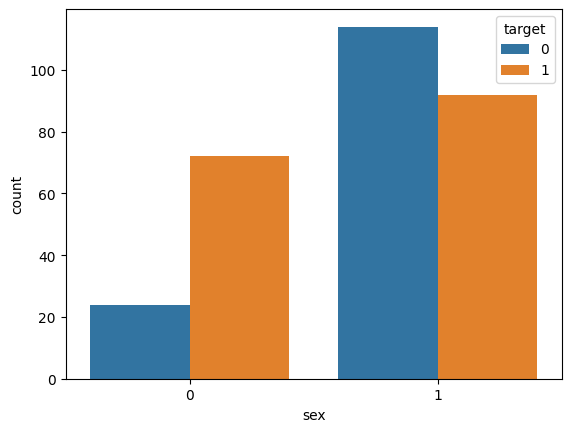

In [ ]:
# countplot

sns.countplot(x = df["sex"] , hue = "target", data = df)

<Axes: xlabel='cp', ylabel='count'>

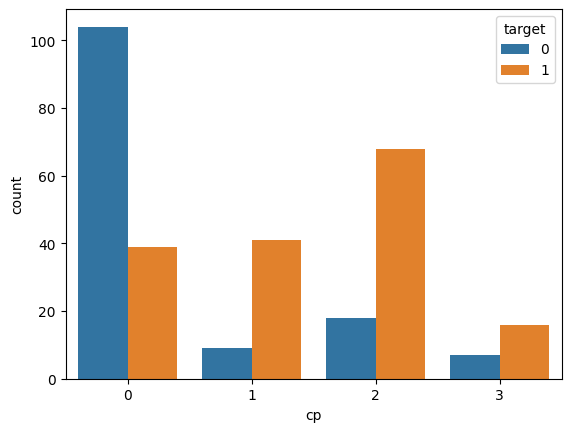

In [ ]:
sns.countplot(x = df["cp"] , hue = "target", data = df)

In [ ]:
#  (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic

<Axes: xlabel='cp', ylabel='Count'>

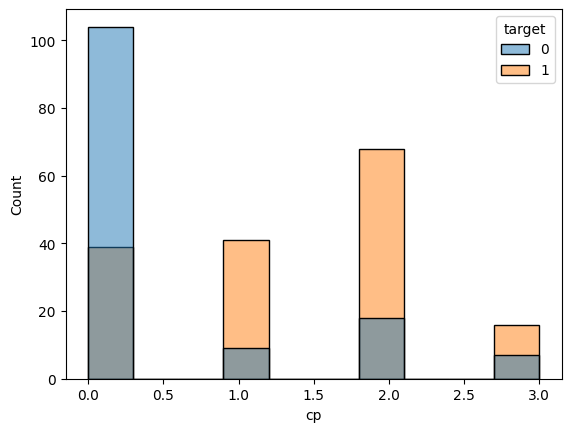

In [ ]:
sns.histplot(x = df["cp"] , hue = "target", data = df)

In [ ]:
# Supervised model building -------- classification model
# independent and dependent column
# divide the data into train and test
# build / create model
# train our model
# test our model --- predict()
# check the model performance (classification) --- accuracy, confusion matrix, classification report
# if its a regression problem ( r2 score, rmse, mse, mae)

In [ ]:
X = df.iloc[:,:-1] #independent columns
y = df["target"]  # dependent column

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=5, train_size=0.70)
print(x_train.shape)
print(x_test.shape)

(211, 13)
(91, 13)


In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_test = clf.predict(x_test)
pred_test

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1])

In [ ]:
accuracy_score(pred_test, y_test) * 100

79.12087912087912

In [ ]:
# overfitting -- train good accuarcy  , test data = less accuracy
# underfitting -- both accuracy les

In [ ]:
pred_train = clf.predict(x_train)
pred_train

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
accuracy_score(pred_train, y_train) * 100

100.0

In [ ]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1 = pd.DataFrame(columns=['max_depth', 'accuracy'])
df1

,max_depth,accuracy


In [ ]:
for i in c_parameter_values:
  model = tree.DecisionTreeClassifier(max_depth = i)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc_score = accuracy_score(y_test,y_pred) *100
  df1 = df1.append({"max_depth": i, "accuracy" :acc_score}, ignore_index = True )

df1

<ipython-input-65-4fe52fecfe03>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({"max_depth": i, "accuracy" :acc_score}, ignore_index = True )
<ipython-input-65-4fe52fecfe03>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({"max_depth": i, "accuracy" :acc_score}, ignore_index = True )
<ipython-input-65-4fe52fecfe03>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({"max_depth": i, "accuracy" :acc_score}, ignore_index = True )
<ipython-input-65-4fe52fecfe03>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({"max_depth": i, "accuracy" :acc_score}, ignore_index = True )


,max_depth,accuracy
0,1.0,76.923077
1,2.0,78.021978
2,3.0,86.813187
3,4.0,78.021978
4,5.0,78.021978
5,6.0,76.923077
6,7.0,78.021978
7,8.0,79.120879
8,9.0,79.120879
9,10.0,78.021978


In [ ]:
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred) *100
acc_score

86.81318681318682

[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.495\nsamples = 211\nvalue = [95, 116]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.409\nsamples = 101\nvalue = [72, 29]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.499\nsamples = 48\nvalue = [23, 25]'),
 Text(0.0625, 0.125, 'gini = 0.4\nsamples = 29\nvalue = [8, 21]'),
 Text(0.1875, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.14\nsamples = 53\nvalue = [49, 4]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.4375, 0.125, 'gini = 0.078\nsamples = 49\nvalue = [47, 2]'),
 Text(0.75, 0.625, 'x[11] <= 0.5\ngini = 0.331\nsamples = 110\nvalue = [23, 87]'),
 Text(0.625, 0.375, 'x[9] <= 1.7\ngini = 0.171\nsamples = 74\nvalue = [7, 67]'),
 Text(0.5625, 0.125, 'gini = 0.091\nsamples = 63\nvalue = [3, 60]'),
 Text(0.6875, 0.125, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.875, 0.375, 'x[9] <= 1.9\ngini = 0.494\nsamples = 36\nvalue = [16, 20]'),
 Text(0.8125, 0.1

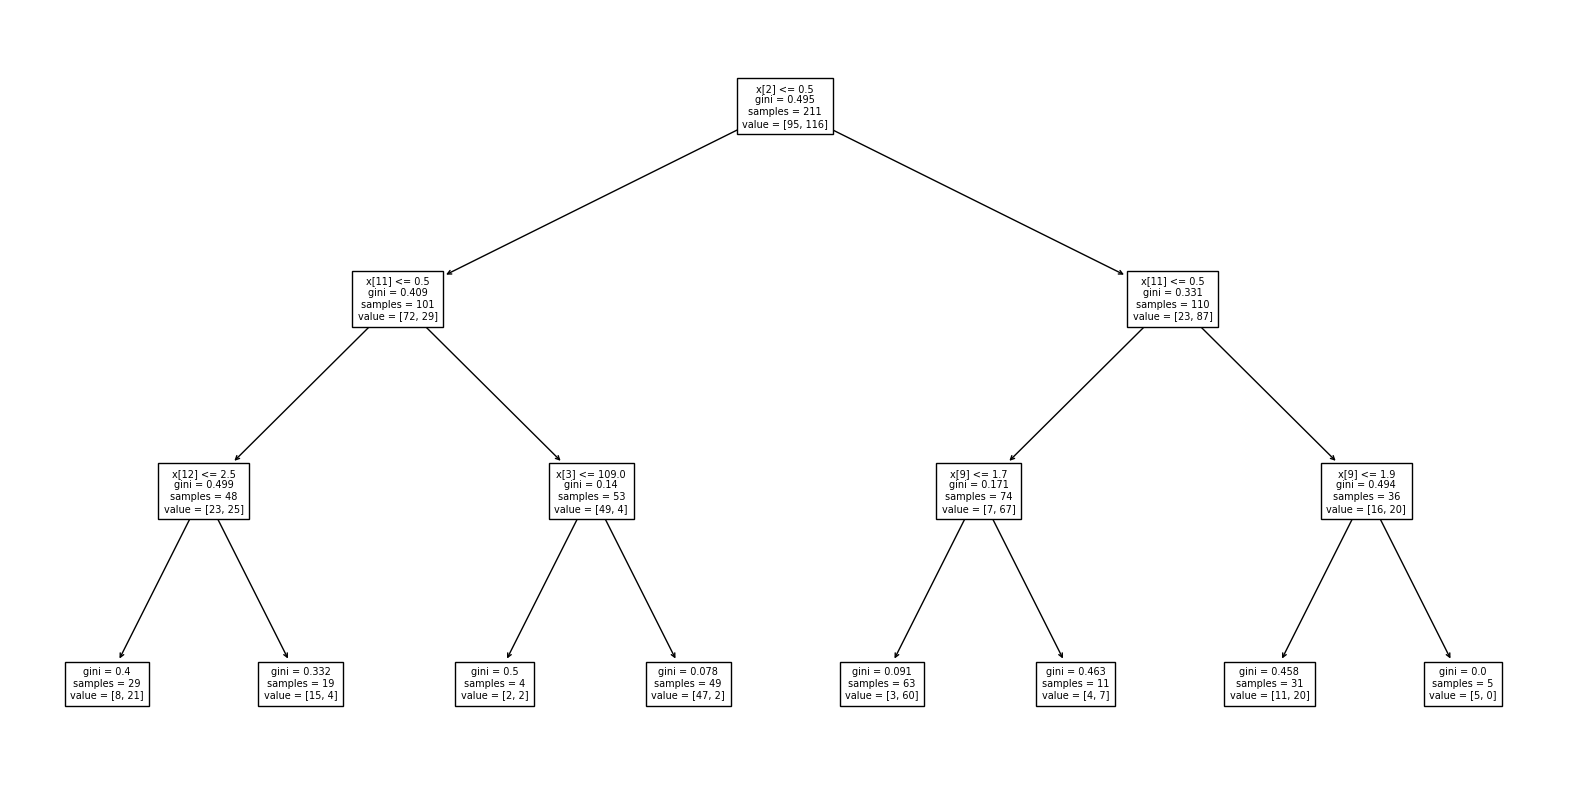

In [ ]:
plt.figure(figsize = (20,10))
tree.plot_tree(model, fontsize = 7)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        43
           1       0.82      0.96      0.88        48

    accuracy                           0.87        91
   macro avg       0.88      0.86      0.87        91
weighted avg       0.88      0.87      0.87        91



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris  # You can replace this with your dataset


# Define the Decision Tree classifier
clf = DecisionTreeClassifier()

# Define a dictionary of hyperparameters and their possible values to search through
param_grid = {
  "max_depth" : [None,1,2,3,4,5,10],
  "min_samples_split" : [2,5,10],
  "min_samples_leaf" : [1,2,4],
  "criterion" : ["gini", "entropy" ]

}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)  # You can adjust the number of cross-validation folds (cv) as needed

# Perform the grid search
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
